# Logistic Regression with Newton's Method

Newton's Method is a second-order optimization algorithm that improves upon gradient descent by using both the **gradient** and **Hessian matrix** (second derivatives) of the loss function. It converges faster than gradient descent, especially when the data is well-behaved.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


In [3]:
# Create synthetic binary classification data
X, y = make_classification(
    n_samples=200, n_features=2, n_redundant=0,
    n_clusters_per_class=1, class_sep=1.5, random_state=42
)

# Add bias term to X
X_b = np.c_[np.ones((X.shape[0], 1)), X] 

X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)


### Mathematical Foundation:
- **Logistic Regression Hypothesis**: 

$$
h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}
$$

- **Gradient** of the log-likelihood:

$$
\nabla_\theta J(\theta) = \frac{1}{m} X^T (h_\theta(X) - y)
$$

- **Hessian** (second derivative of the log-likelihood):

$$
H(\theta) = \frac{1}{m} X^T \text{diag}(h_\theta(X)(1 - h_\theta(X))) X
$$

- **Newton's Update Rule**:

$$
\theta^{(new)} = \theta - H^{-1} \nabla_\theta J(\theta)
$$

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [5]:
def compute_gradient(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    gradient = (1 / m) * X.T @ (h - y)
    return gradient

def compute_hessian(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    diag = np.diag(h * (1 - h))
    hessian = (1 / m) * X.T @ diag @ X
    return hessian


In [6]:
def newtons_method(X, y, theta, max_iter = 100, tol = 1e-6):
    for i in range(max_iter):
        gradient = compute_gradient(X, y, theta)
        hessian = compute_hessian(X, y, theta)

        theta_new = theta - np.linalg.inv(hessian) @ gradient

        # Check for convergence
        if np.linalg.norm(theta_new - theta, ord=2) < tol:
            print(f"Converged in {i+1} iterations.")
            break
        
        theta = theta_new
    
    return theta

In [7]:
theta_init = np.zeros(X_train.shape[1])

theta_newton = newtons_method(X_train, y_train, theta_init)

print("Learned Parameters (theta):", theta_newton)


Converged in 8 iterations.
Learned Parameters (theta): [ 1.33606723  2.67748705 -0.92106383]


In [8]:
def predict(X, theta):
    return (sigmoid(X @ theta) >= 0.5).astype(int)

y_pred = predict(X_test, theta_newton)

accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.2%}")


Test Accuracy: 90.00%


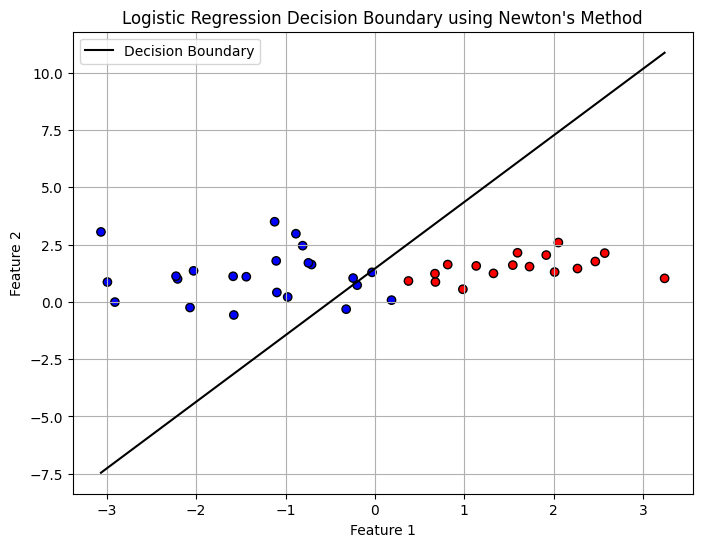

In [9]:
def plot_decision_boundary(X, y, theta):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 1], X[:, 2], c=y, cmap='bwr', edgecolors='k')

    x1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    x2 = -(theta[0] + theta[1] * x1) / theta[2]
    plt.plot(x1, x2, color='black', label='Decision Boundary')

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Logistic Regression Decision Boundary using Newton's Method")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary(X_test, y_test, theta_newton)


Newton's method converges faster in practice, as it uses second-order derivatives, making it more effective when the Hessian is easily computable.
